In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt

In [ ]:
#create data
xtrain = np.random.random((1000 , 20))
ytrain = np.random.randint(2 , size=(1000 , 1))
print(ytrain.shape)

xtest = np.random.random((100 , 20))
ytest = np.random.randint(2, size=(100,1))
print(ytest.shape)

(1000, 1)
(100, 1)


In [ ]:
# to_categorical data

ytrain = keras.utils.to_categorical(ytrain , num_classes=2)
ytest= keras.utils.to_categorical(ytest , num_classes=2)
print(ytrain.shape)
print(ytest.shape)

(1000, 2)
(100, 2)


In [ ]:
#create structure of network

model = keras.models.Sequential()
model.add(keras.layers.Dense(64 , input_dim=20)) #input_dim for first layer
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(32))
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(2))
model.add(keras.layers.Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,490 (13.63 KB)

 Trainable params: 3,490 (13.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(keras.optimizers.SGD(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
output_fit = model.fit(xtrain , ytrain , batch_size=128 , epochs=50)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5029 - loss: 0.6981  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5130 - loss: 0.6929 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4938 - loss: 0.6966 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4905 - loss: 0.6958 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4813 - loss: 0.6966 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4902 - loss: 0.6947  
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4838 - loss: 0.6970 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4827 - loss: 0.6951 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4919 - loss: 0.6950 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5144 - loss: 0.6933 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5139 - loss: 0.6936  
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4871 - loss: 0.6964

In [ ]:
print(output_fit.history.keys())

dict_keys(['accuracy', 'loss'])


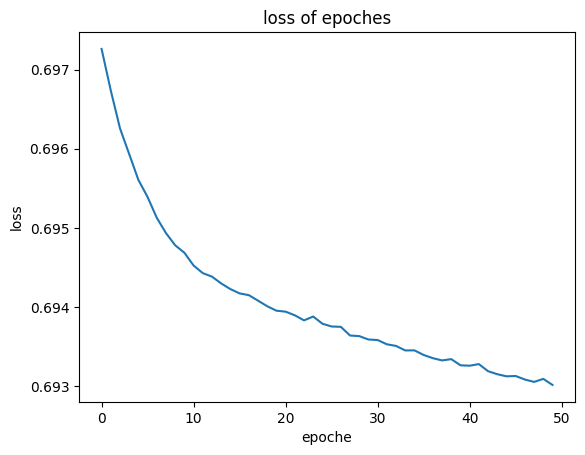

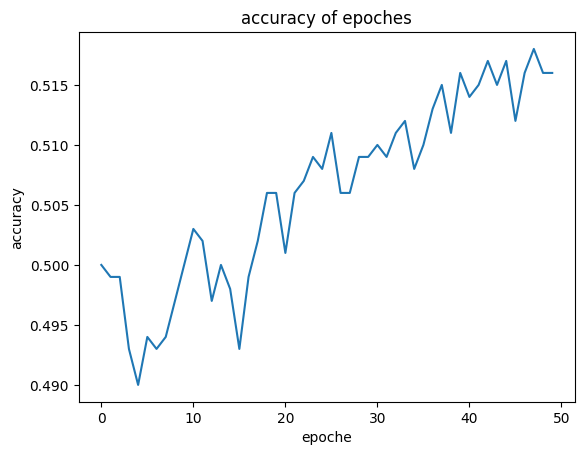

In [ ]:
plt.plot(output_fit.history['loss'])
plt.title('loss of epoches')
plt.xlabel('epoche')
plt.ylabel('loss')
plt.show()

plt.plot(output_fit.history['accuracy'])
plt.title('accuracy of epoches')
plt.xlabel('epoche')
plt.ylabel('accuracy')
plt.show()



In [ ]:
predict_out = model.predict(xtest , batch_size=128)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [ ]:
# print(ytrain[0:10])
# print(predict_out)

In [ ]:
out_eval = model.evaluate(xtest , ytest , batch_size=64)
print(out_eval)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5608 - loss: 0.6914 
[0.69321608543396, 0.5600000023841858]


In [ ]:
predicted_classes = np.argmax(model.predict(xtest, batch_size=64), axis=-1)
print(predicted_classes)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
[0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0]
